In [352]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [353]:
import warnings
warnings.filterwarnings('ignore')


In [354]:
import scipy
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
#Rob: toggle flags
apply_standardization =1
apply_transform =1

## Load and Concatenate

In [355]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [356]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [357]:
train.shape

(1460, 81)

In [358]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [359]:
test.shape

(1459, 80)

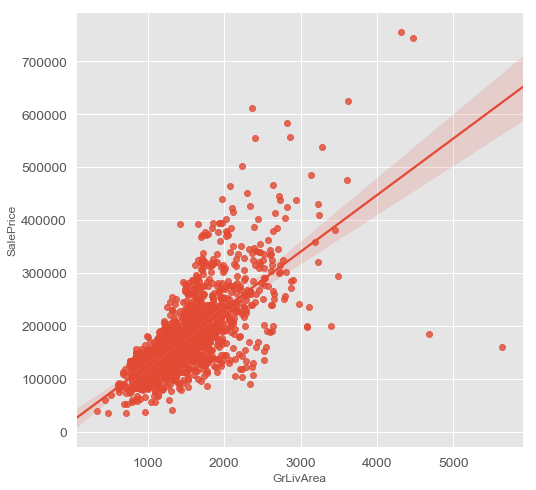

In [360]:
# Very first visual check -- SalePrice ~ GrLivArea
plt.figure(figsize=(8,8))
sns.regplot(x=train.GrLivArea, y=train.SalePrice, data=train)

In [361]:
# remove outliers with GrLivArea > 4_000 sqf
#Rob: revisit these 4 outliers once model pipeline is complete
train = train[train.GrLivArea < 4_000]

In [362]:
# TARGET VARIABLE
Price = train.pop('SalePrice')

In [363]:
df = pd.concat([train, test], axis=0)

In [364]:
df.shape

(2915, 80)

In [365]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2915.0,1460.734820,843.045773,1.0,731.5,1462.0,2190.50,2919.0
MSSubClass,2915.0,57.133791,42.546667,20.0,20.0,50.0,70.00,190.0
LotFrontage,2429.0,69.128860,22.715440,21.0,59.0,68.0,80.00,313.0
LotArea,2915.0,10133.648714,7806.198515,1300.0,7474.0,9450.0,11554.50,215245.0
OverallQual,2915.0,6.083705,1.403444,1.0,5.0,6.0,7.00,10.0
OverallCond,2915.0,5.565009,1.113718,1.0,5.0,5.0,6.00,9.0
YearBuilt,2915.0,1971.271698,30.290998,1872.0,1953.0,1973.0,2001.00,2010.0
YearRemodAdd,2915.0,1984.240480,20.897341,1950.0,1965.0,1993.0,2004.00,2010.0
MasVnrArea,2892.0,101.399378,177.452915,0.0,0.0,0.0,164.00,1600.0
BsmtFinSF1,2914.0,438.098147,442.872077,0.0,0.0,368.0,732.00,4010.0


## Divide by data type

In [366]:
# drop Id
df.drop(['Id'], axis=1, inplace=True)

In [367]:
#Rob: changed to list(...columns)
cat_features = list(train.select_dtypes(include=['object']).columns)
print(f'Object types:  {len(cat_features)}')
print(cat_features)

Object types:  43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [368]:
#Rob: changed to list(...columns)

num_features = list(train.select_dtypes(include=['int64','float64']).columns)
print(f'Numeric types:  {len(num_features)}')
print(num_features)

Numeric types:  37
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [369]:
# Some numeric features are categorical and ordinal, 
# leave the numerical values (potentially intact) but reclassify to categorical
cat_features += ['OverallQual', 'OverallCond']

# Some numeric features are categorical by nature and NOT ordinal: replace with string
df['MSSubClass'] = df.MSSubClass.apply(lambda x: str(x))
df['MoSold'] = df.MoSold.apply(lambda x: str(x))
df['YrSold'] = df.YrSold.apply(lambda x: str(x))

cat_features += ['MSSubClass', 'MoSold', 'YrSold']

print(f'Object types:  {len(cat_features)}')

Object types:  48


In [370]:
# Remove newly classified categoricals from numeric
num_features = [f for f in num_features if f not in cat_features] 
print(f'Numeric types:  {len(num_features)}')

Numeric types:  32


In [371]:
print(cat_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond', 'MSSubClass', 'MoSold', 'YrSold']


In [372]:
print(num_features)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


## Classify Ordinal vs. Nominal

By default, all categorical features are nominal.  The following are classified ordinal:
- levels are clearly ordered (e.g. Functional, LandSlope, LotShape). This is regardless of the feature's correlation with price, e.g. may be completely uncorrelated. 
- if we __suspect__ order, verify by a boxplot Price~Feature (e.g. 'MSSubClass'). Classify as ordinal only if there is visual correlation with sorted levels

In [373]:
cat_ordinal = [  # definitely ordinal
'Street',
'Alley',
'LotShape',
'Utilities',
'LandSlope',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
]
print(f'Definitely ordinal:  {len(cat_ordinal)}')

Definitely ordinal:  22


In [374]:
cat_ordinal_candidates = [ # potentially ordinal
'MSSubClass',
'LandContour',
'LotConfig',
'BldgType',    
'HouseStyle',    
'Foundation',
'Electrical',
'Fence',
'SaleType',
'SaleCondition',
]
print(f'Potentially ordinal:  {len(cat_ordinal_candidates)}')

Potentially ordinal:  10


In [375]:
cat_nominal = [f for f in cat_features if f not in cat_ordinal and f not in cat_ordinal_candidates] 
print(f'Definitely nominal:  {len(cat_nominal)}')
cat_nominal

Definitely nominal:  16


['MSZoning',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Heating',
 'GarageType',
 'MiscFeature',
 'OverallQual',
 'OverallCond',
 'MoSold',
 'YrSold']

In [376]:
# We care about display order for the candidate ordinals:
#Rob: added VWD to SaleType, removed comma after SaleCondition 
display_order = {
'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '160', '180', '190'],
'LandContour': ['Lvl','Bnk', 'HLS', 'Low'],
'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
'BldgType':    ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
'HouseStyle':  ['1Story', '1.5Unf', '1.5Fin', '2Story', '2.5Unf', '2.5Fin', 'SFoyer', 'SLvl'],    
'Foundation': ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'],
'Electrical': ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'],
'Fence': ['GdPrv','MnPrv','GdWo', 'MnWw','NA'],
'SaleType': ['WD','CWD','New','COD','Con','ConLw','ConLI','ConLD','Oth','VWD'],
'SaleCondition': ['Normal','Abnorml','AdjLand','Alloca','Family','Partial']
}

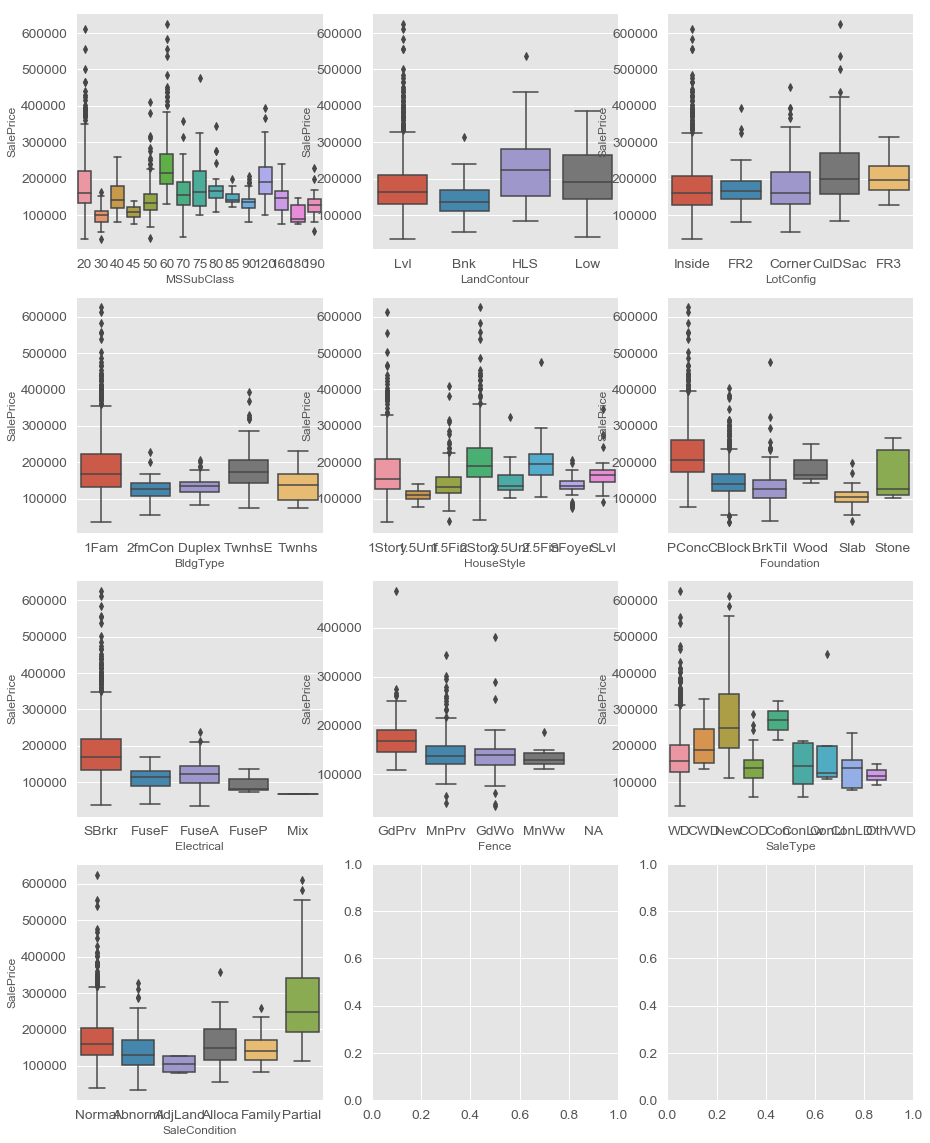

In [377]:
# concatenate Y back for visual purposes
train_processed = pd.concat([df.iloc[:len(Price),:], Price], axis=1)

# plt.subplots(nrows, ncols, figsize=(width, height))
nc  = 3
nr  = 1+len(cat_ordinal_candidates)//nc
f,axes = plt.subplots(nr, nc, figsize=(nc*5, nr*5))

counter = 0
for f in cat_ordinal_candidates:
    sns.boxplot(f, 'SalePrice', data=train_processed, order=display_order[f], 
                ax = axes[counter//nc][counter%nc])
    counter+=1

Conclusion: there is no internal order that would cause a visible correlation with the Price. All candidate features should be classified as nominal. 
#Rob:added for Sam - Fence looks more ordinal than not so adding to ordinals

In [378]:
##Rob: adding Fence as an ordinal categorical feature
cat_ordinal_candidates = [f for f in cat_ordinal_candidates if f not in ['Fence']]
cat_ordinal += ['Fence']
cat_nominal = cat_nominal + cat_ordinal_candidates
cat_nominal = list(set(cat_nominal))
cat_ordinal = list(set(cat_ordinal))

print(f'Nominal features:  {len(cat_nominal)}')
print(f'Ordinal features:  {len(cat_ordinal)}')

Nominal features:  25
Ordinal features:  23


Nominal categorical will only be dummified, ordinals remain intact (possibly rescaling)

## Categorical features: Impute nan

Verify each categorical feature to apply the following approach:
- nominal features: replace nan with string 'None' unless has specific meaning
- ordinal features: replace nan with 0 unless nan means something else. Nan typically means the absence of the feature such as 'no garage'.  Later, map the remaining levels to 1,2,..

In [379]:
for f in cat_nominal:
    nans = df[f].isna().sum()
    if nans>0:
        print(f'{nans}   nans in   {f}')

157   nans in   GarageType
1   nans in   Electrical
2810   nans in   MiscFeature
1   nans in   SaleType
1   nans in   Exterior1st
4   nans in   MSZoning
1   nans in   Exterior2nd
24   nans in   MasVnrType


In [380]:
for f in cat_ordinal:
    nans = df[f].isna().sum()
    if nans>0:
        print(f'{nans}   nans in   {f}')

159   nans in   GarageQual
2907   nans in   PoolQC
81   nans in   BsmtQual
1420   nans in   FireplaceQu
2345   nans in   Fence
82   nans in   BsmtExposure
80   nans in   BsmtFinType2
79   nans in   BsmtFinType1
159   nans in   GarageFinish
82   nans in   BsmtCond
2717   nans in   Alley
159   nans in   GarageCond
1   nans in   KitchenQual
2   nans in   Utilities
2   nans in   Functional


Checked all missing columns, the default approach of replacing with 'None' and 0 should work

In [381]:
for f in cat_nominal:
    df[f].fillna('None', inplace=True)

In [382]:
for f in cat_ordinal:
    df[f].fillna(0, inplace=True)

## Map Ordinal to numeric

In [383]:
# NB map the FULL dictionary from the description b/c some labels may appear only in the test set
# still, check unique levels for all ordinals in the train set
{f: list(train[f].unique()) for f in cat_ordinal}

{'GarageQual': ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'],
 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'PoolQC': [nan, 'Ex', 'Fa', 'Gd'],
 'BsmtQual': ['Gd', 'TA', 'Ex', nan, 'Fa'],
 'FireplaceQu': [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'Fence': [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', nan],
 'CentralAir': ['Y', 'N'],
 'BsmtFinType2': ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', nan],
 'BsmtCond': ['TA', 'Gd', nan, 'Fa', 'Po'],
 'PavedDrive': ['Y', 'N', 'P'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'Alley': [nan, 'Grvl', 'Pave'],
 'Street': ['Pave', 'Grvl'],
 'GarageCond': ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'Functional': ['Typ', 'Min1', '

In [384]:
# Mapping convention: higher levels ~ higher price (NOT always applicable, e.g. LotShape)
# arbitrary convention for the sake of interpretation consistency, should not affect any ML
ordinal_to_numeric = {
    'Street': {'Grvl':1, 'Pave':2},
    'Alley': {'Grvl':1, 'Pave':2},
    'LotShape': {'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4},
    'Utilities': {'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4},
    'LandSlope': {'Gtl':1, 'Mod':2, 'Sev':3}, #Rob: order reversed? shouldn't affect anything but the interpretation
    'Fence':{'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, #Rob: added per Sam's analysis

    'ExterQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'ExterCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},

    'BsmtQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtExposure': {'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    'BsmtFinType1': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFinType2': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},

    'HeatingQC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'CentralAir': {'N':0, 'Y':1},
    'KitchenQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    # bigger step for 'Typical' - #Rob: why use a larger step between Min1 and Typ?
    'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':10},  
    'FireplaceQu': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},

    'GarageFinish': {'Unf':1, 'RFn':2, 'Fin':3},
    'GarageQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},

    'PavedDrive': {'N':1, 'P':2, 'Y':3},
    'PoolQC': {'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
}

In [385]:
for f in ordinal_to_numeric:
    df[f].replace(ordinal_to_numeric[f], inplace=True)

In [386]:
# verify 
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,2,0,1,Lvl,4,Inside,...,0,0,0,0,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,2,0,1,Lvl,4,FR2,...,0,0,0,0,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,2,0,2,Lvl,4,Inside,...,0,0,0,0,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,2,0,2,Lvl,4,Corner,...,0,0,0,0,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,2,0,2,Lvl,4,FR2,...,0,0,0,0,None,0,12,2008,WD,Normal


## Adding new Boolean features

In [387]:
# Booleans
df['_Basement'] = df.TotalBsmtSF>0
df['_Garage'] = df.GarageArea>0
df['_Pool'] = df.PoolArea>0
df['_Fence'] = df.Fence!=0  #Rob: Fence is now an ordinal so check for 0 instead of None
# combine 4 types of porches
df['_Porch'] = df.OpenPorchSF+df.EnclosedPorch+df['3SsnPorch']+df.ScreenPorch > 0

#Rob:added
df['_MasVnrArea'] = (df.MasVnrType != 'None')
df['_WoodDeck'] = df.WoodDeckSF > 0
df['_MiscFeature'] = (df.MiscFeature!='None')

In [388]:
# More Booleans
#Rob: revisit the bucketing on YearBuilt if there's time
df['_New'] = df.YearBuilt > 2000  #potentially bucketize the entire range
df['_Old'] = df.YearBuilt < 1920 

df['_Remodeled'] = df.YearRemodAdd != df.YearBuilt
df['_NormalSale'] = df.SaleCondition=='Normal'
df['_AfterWW2'] = (df.YearBuilt >= 1946) #Rob: added per Sam's analysis

In [389]:
#Rob: all the boolean features created thus far
new_boolean = ['_Basement', '_Garage', '_Pool', '_Fence', '_Porch','_MasVnrArea','_WoodDeck', '_MiscFeature','_New',
               '_Old', '_Remodeled', '_NormalSale','_AfterWW2']

In [390]:
# convert to int
for f in new_boolean:
    df[f]=df[f].astype(np.int64)

## Clustering: Categorical

In [391]:
# (optionally add TSNE / UMAP)

In [392]:
all_categorical = cat_nominal + cat_ordinal + new_boolean

In [393]:
chisq_table = np.zeros((len(all_categorical), len(all_categorical)))

for i, f1 in enumerate(all_categorical):
    for j, f2 in enumerate(all_categorical):
        tab = pd.crosstab(df[f1], df[f2])
        chisq_table[i,j] = scipy.stats.chi2_contingency(tab)[1]

sort_order = np.argsort(chisq_table.sum(axis=0))
chisq_table = chisq_table[:,sort_order]
chisq_table = chisq_table[sort_order,:]
heatmap_labels = [all_categorical[i] for i in sort_order]

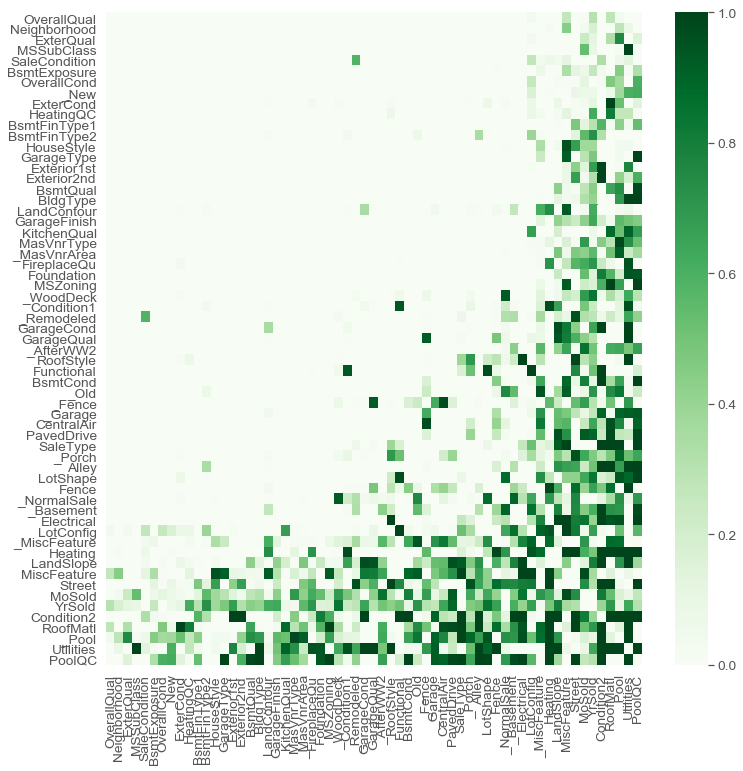

In [394]:
plt.figure(figsize=(12,12))
sns.heatmap(chisq_table, cmap="Greens", xticklabels=heatmap_labels, yticklabels=heatmap_labels)

- The core group of ~10-15 defining characteristics at the top, highly influential (ExterQual, OverallQual, MSSubClass, Neighborhood, New, etc)
- A few categories at the bottom seem to be randomly spread -> candidates for removal

In [395]:
n_tail = 15  #candidates to be removed with n as HP
removal_candidates_0 = heatmap_labels[-n_tail:]
removal_candidates_0

['_Basement',
 'Electrical',
 'LotConfig',
 '_MiscFeature',
 'Heating',
 'LandSlope',
 'MiscFeature',
 'Street',
 'MoSold',
 'YrSold',
 'Condition2',
 'RoofMatl',
 '_Pool',
 'Utilities',
 'PoolQC']

## ANOVA

Verify the clustering intuition with ANOVA LogPrice~Category 

In [396]:
# ANOVA requires that the reponse variables be ~ normal. Log transform the SalePrice.

In [397]:
LogPrice=np.log(Price).rename('LogPrice')

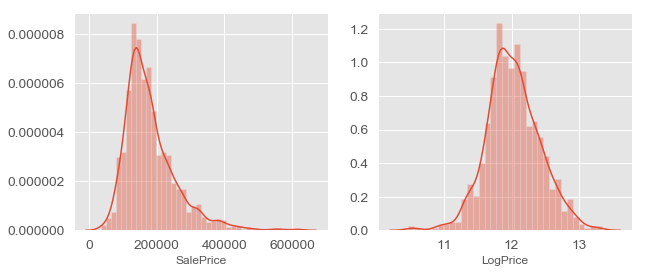

In [398]:
f,axes = plt.subplots(1, 2, figsize=(10, 4))

sns.distplot(Price, ax=axes[0])
sns.distplot(LogPrice, ax=axes[1])

Text(0.5, 1.0, 'After log transform')

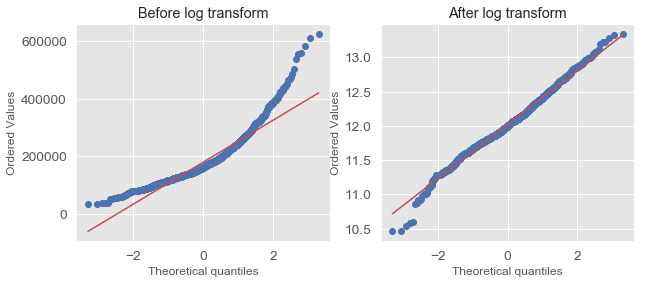

In [399]:
#Rob: put the before and after Q-Q plots side by side for better visuals.
f,axes = plt.subplots(1, 2, figsize=(10, 4))
res1 = stats.probplot(Price, plot=axes[0])
axes[0].set_title("Before log transform")
res2 = stats.probplot(LogPrice, plot=axes[1])
axes[1].set_title("After log transform")

In [400]:
# concatenate Y back for visual purposes
train_processed = pd.concat([df.iloc[:len(LogPrice),:], LogPrice], axis=1)

In [401]:
train_processed.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,_Porch,_MasVnrArea,_WoodDeck,_MiscFeature,_New,_Old,_Remodeled,_NormalSale,_AfterWW2,LogPrice
0,60,RL,65.0,8450,2,0,1,Lvl,4,Inside,...,1,1,0,0,1,0,0,1,1,12.247694
1,20,RL,80.0,9600,2,0,1,Lvl,4,FR2,...,0,0,1,0,0,0,0,1,1,12.109011


In [402]:
# ANOVA F-statistic with its p-value
F_values, p_values = {},{}

for f in all_categorical:
    group_prices = []
    for group in train_processed[f].unique():
        group_prices.append(train_processed[train_processed[f]==group]['LogPrice'].values)

    F_values[f], p_values[f] = scipy.stats.f_oneway(*group_prices)

In [403]:
F_values = {k:v for k,v in sorted(F_values.items(), key=lambda x: x[1])}
p_values = {k:v for k,v in sorted(p_values.items(), key=lambda x: x[1])}

In [404]:
p_values

{'OverallQual': 0.0,
 'Neighborhood': 7.451511247758564e-242,
 'ExterQual': 5.487175661842523e-196,
 'BsmtQual': 2.3173557817592845e-187,
 'KitchenQual': 5.292077079765444e-186,
 'GarageFinish': 2.7129993153636604e-151,
 'GarageType': 3.8754404716470255e-126,
 'MSSubClass': 1.3207872601320131e-114,
 'FireplaceQu': 1.259783529169019e-113,
 'Foundation': 1.4239979430131833e-111,
 '_New': 1.9683225274080212e-87,
 'HeatingQC': 2.058334264452287e-82,
 'BsmtFinType1': 3.1174290570333098e-77,
 'MasVnrType': 3.061545957996824e-67,
 'MSZoning': 2.8287104898669344e-60,
 'Exterior1st': 3.1629861258661e-56,
 '_MasVnrArea': 1.991342016079393e-54,
 'OverallCond': 5.422658470876797e-54,
 'Exterior2nd': 5.062412545054888e-50,
 'GarageCond': 8.378096673084188e-48,
 '_AfterWW2': 1.1217261332133207e-46,
 'BsmtExposure': 1.864979140868811e-46,
 'GarageQual': 2.0672588008711154e-46,
 'CentralAir': 3.7176103148526634e-44,
 'SaleCondition': 4.115462010677253e-44,
 'SaleType': 1.6088300269571204e-37,
 '_Porch


Possible candiates to remove with p-value >0.05: #Rob: changed p-value threshold to 0.05
- '_Pool'
- 'PoolQC'
- 'LandSlope'
- 'MoSold'
- 'YrSold'
- 'Utilities'

## Classify and Visualize

In [405]:
len(all_categorical)

61

In [406]:
#Rob: added the 3 new boolean features
cat_qual = [
 'OverallQual', 
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Heating',
 'GarageType',
 'MiscFeature',  # mainly shed
 
 'Foundation',
 'Electrical',
 'Fence',
 'Utilities',
 
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',

 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 '_Basement',
 '_Garage',
 '_Pool',
 '_Fence',
 '_Porch',
 '_MasVnrArea',
 '_WoodDeck',
 '_AfterWW2',
 '_MiscFeature'
]

In [407]:
len(cat_qual)

38

In [408]:
# [x for x in all_categorical if x not in elements]

In [409]:
cat_location = [
'MSZoning',
'Neighborhood',
'Condition1',
'Condition2',
]
                
cat_sale = [            
'SaleType',
'SaleCondition',
'_NormalSale',
'MoSold',
'YrSold',
]
    
cat_type = [
'MSSubClass',
'BldgType',
'HouseStyle',
'Functional',
'_Remodeled',
'_Old',
'_New',
]

cat_land = [    
'LotShape',
'LandSlope',
'LandContour',
'LotConfig',
'Street',
'Alley',
'PavedDrive',
]

In [410]:
# verify completeness
assert set(all_categorical)==set(cat_qual+cat_location+cat_sale+cat_type+cat_land)
assert len(all_categorical)==len(cat_qual+cat_location+cat_sale+cat_type+cat_land)


In [411]:
def plot_counts(cat_group, col_wrap=4):
    f = pd.melt(df, value_vars=cat_group)
    g = sns.FacetGrid(f, col='variable', col_wrap=col_wrap, sharex=False, sharey=False)
    g = g.map(sns.countplot, 'value')
    [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
    g.fig.tight_layout()
    plt.show()    

In [412]:
#Rob : disabling the plots of histograms for now as they don't add much information at this point
show_hist = 0 

In [413]:
if show_hist:
    plot_counts(cat_qual)

In [414]:
if show_hist:
    plot_counts(cat_location)

In [415]:
if show_hist:
    plot_counts(cat_sale)

In [416]:
if show_hist:
    plot_counts(cat_type)

In [417]:
if show_hist:
    plot_counts(cat_land)

## Influential features

In [418]:
#Select least p-value features on the F-test. Visualize Boxplots (Price or LogPrice?)

In [419]:
cat_influential = [
# from cat_location
'Neighborhood',
'MSZoning',
# from the cat_sale
'SaleCondition',
'SaleType',    
# from cat_type
'MSSubClass',
'_Old',
'_New',    
# zero from the cat_land
# from cat_qual
'OverallQual', 
'OverallCond',
'KitchenQual',
'FireplaceQu',
'Foundation',
'HeatingQC',
'CentralAir',    
'MasVnrType',
'_Porch',  
    
'Exterior1st',
'Exterior2nd',
'ExterQual',   
    
'GarageFinish',
'GarageType',
'GarageQual',    
'GarageCond',
'_Garage',    
    
'BsmtQual',
'BsmtExposure',    
'BsmtFinType1',    
]
print(f'Inflential features:  {len(cat_influential)}')


Inflential features:  27


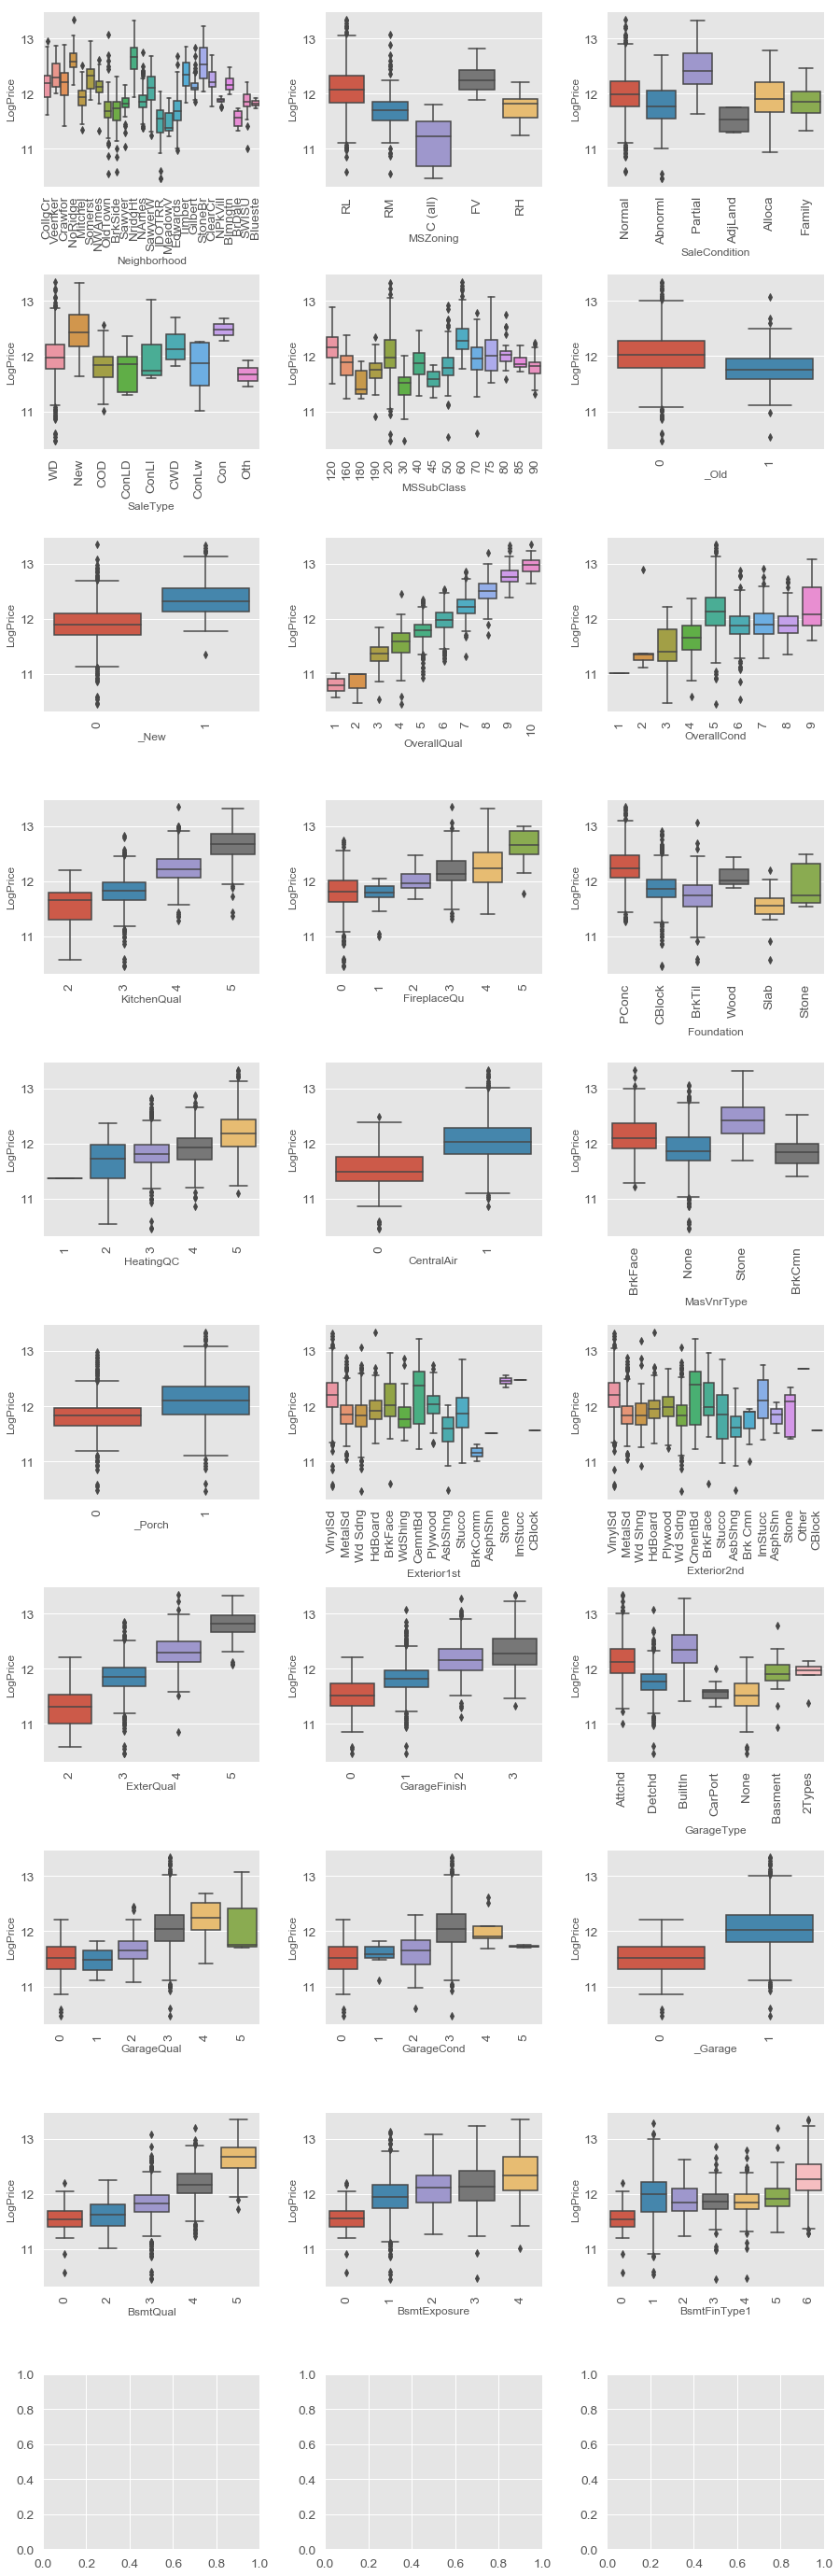

In [420]:
# concatenate Y back for visual purposes
train_processed = pd.concat([df.iloc[:len(LogPrice),:], LogPrice], axis=1)

# plt.subplots(nrows, ncols, figsize=(width, height))
nc  = 3
nr  = 1+len(cat_influential)//nc
f,axes = plt.subplots(nr, nc, figsize=(nc*5, nr*5))
f.subplots_adjust(hspace=.5, wspace=.3,)

counter = 0
for f in cat_influential:
    ax = sns.boxplot(f, 'LogPrice', data=train_processed, ax = axes[counter//nc][counter%nc])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    counter+=1


# NUMERICAL

In [421]:
# divide into 3 groups
len(num_features)

32

In [422]:
num_continous = [
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
]

In [423]:
num_count = [
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',      
]

num_buckets = [
'YearBuilt',
'YearRemodAdd',
'GarageYrBlt',
]


In [424]:
len(num_continous) + len(num_buckets) + len(num_count)

31

In [425]:
df[num_continous].shape

(2915, 19)

In [426]:
df[num_continous].isnull().sum(axis=0)

LotFrontage      486
LotArea            0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

## Impute missing values

In [427]:
#Rob:
#impute missing values using KNN -- use all features in training set impute missing values for LotFrontage & MasVnr

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= round(np.sqrt(train[num_continous].shape[0])))

imputer.fit(train['LotFrontage'][:,np.newaxis])
df['LotFrontage'] = imputer.transform(df['LotFrontage'][:,np.newaxis])

imputer.fit(train['MasVnrArea'][:,np.newaxis])
df['MasVnrArea'] = imputer.transform(df['MasVnrArea'][:,np.newaxis])





In [428]:
# sum(df.isnull().sum(axis=0))
for f in df.columns:
    nans = df[f].isna().sum()
    if nans>0:
        print(f'{nans}   nans in   {f}')

1   nans in   BsmtFinSF1
1   nans in   BsmtFinSF2
1   nans in   BsmtUnfSF
1   nans in   TotalBsmtSF
2   nans in   BsmtFullBath
2   nans in   BsmtHalfBath
159   nans in   GarageYrBlt
1   nans in   GarageCars
1   nans in   GarageArea


In [429]:
# Explore GarageYrBlt
df[df.GarageYrBlt.isna() & df._Garage==1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,_Fence,_Porch,_MasVnrArea,_WoodDeck,_MiscFeature,_New,_Old,_Remodeled,_NormalSale,_AfterWW2
666,60,RM,57.0,8094,2,1,1,Lvl,4,Inside,...,1,1,0,1,1,0,1,1,1,0


In [430]:
# replace all with zeros
for f in df.columns:
    df[f].fillna(0, inplace=True)                

In [431]:
#Rob: making the merge easier by creating the df train
train = pd.concat([df.iloc[:len(LogPrice),:], LogPrice], axis=1)

## Numerical features: Correlations & transformations

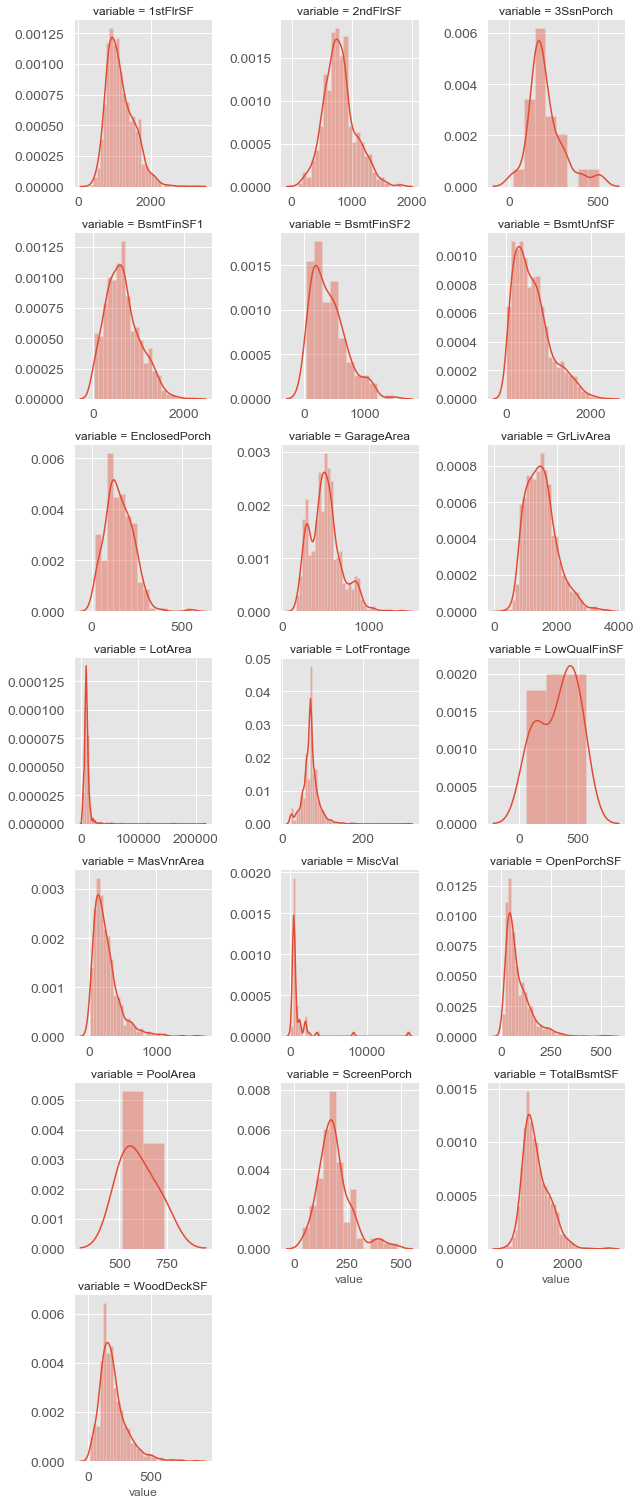

In [432]:
#density plots of original numerica features
f = pd.melt(train[num_continous][train[num_continous]>0], value_vars=sorted(num_continous))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

pretty much every numerical feature exhibits right skewness - these are good candidates for log transformation

In [433]:
##transform all numerical values
train_transformed = train[num_continous].copy()

for f in num_continous:
    train_transformed.loc[:,f] = np.log1p(train[f])

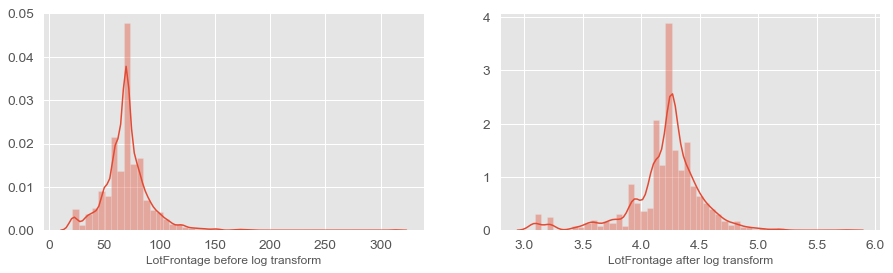

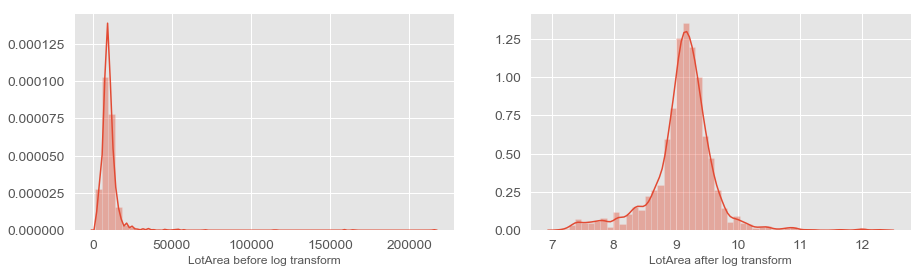

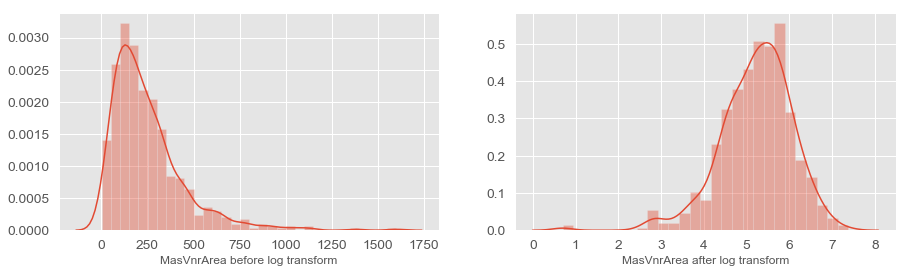

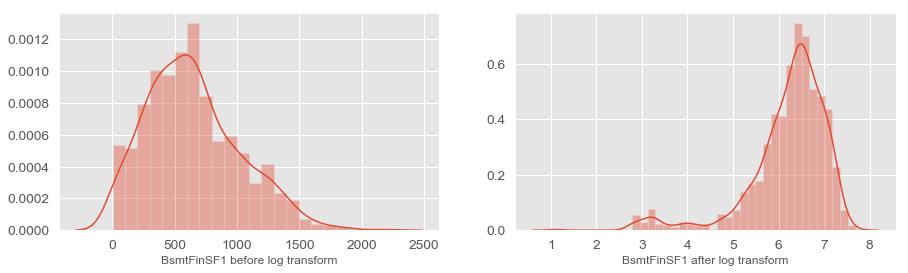

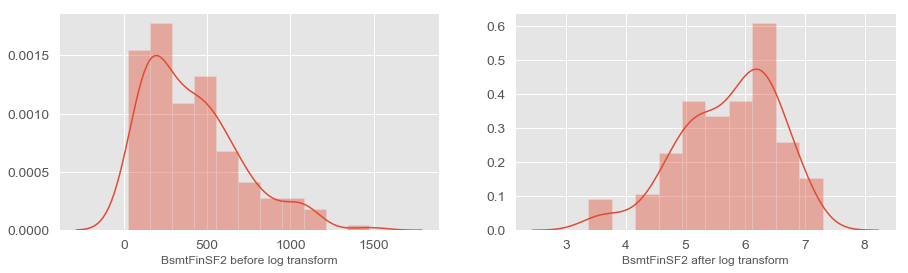

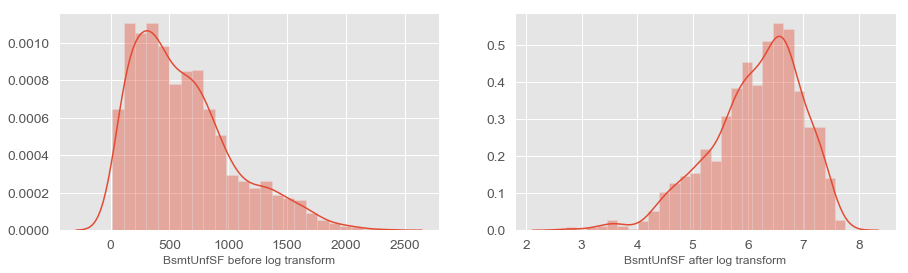

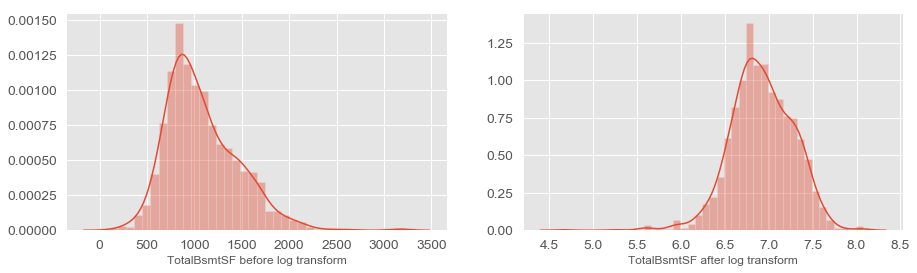

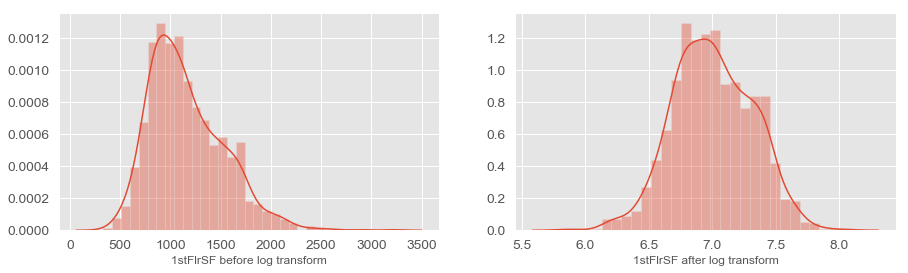

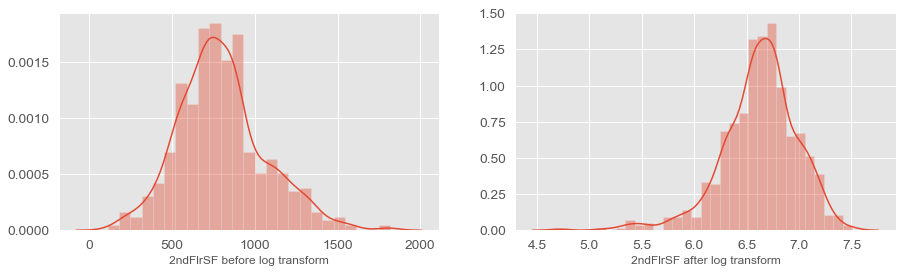

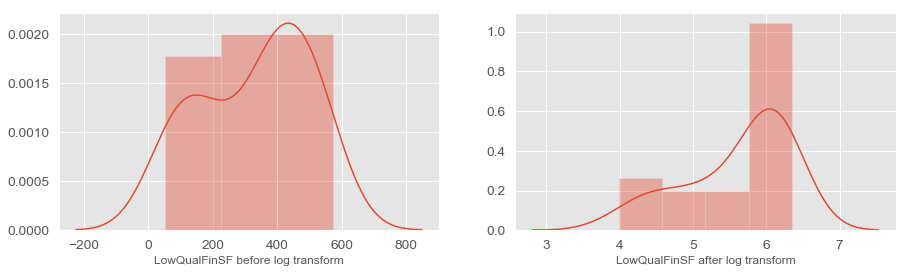

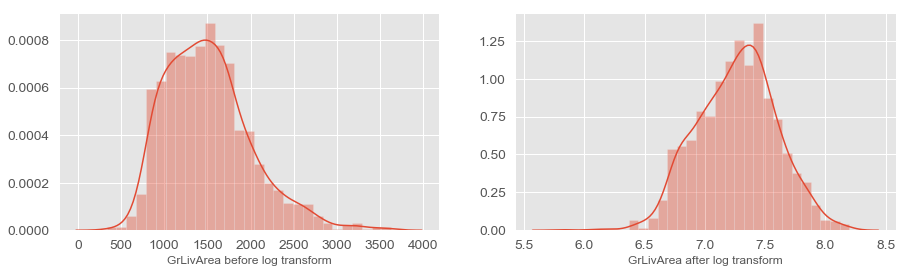

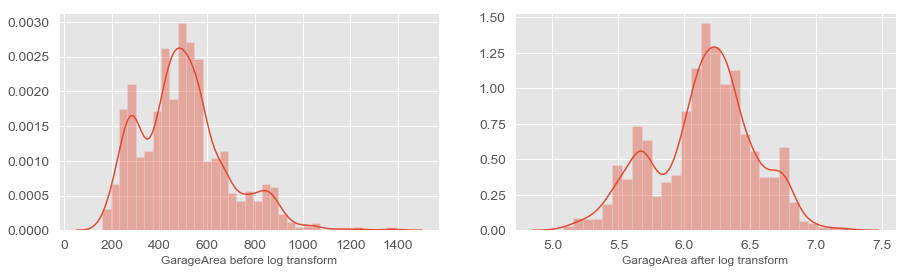

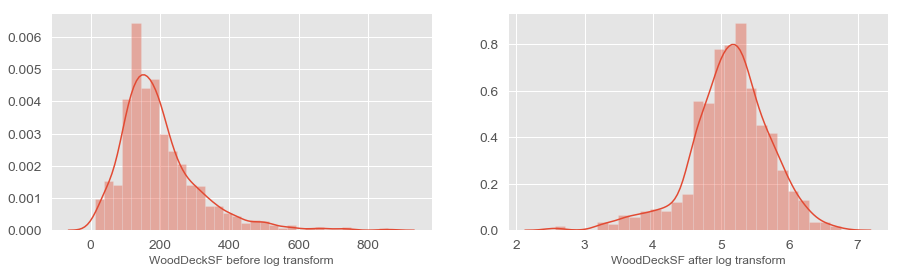

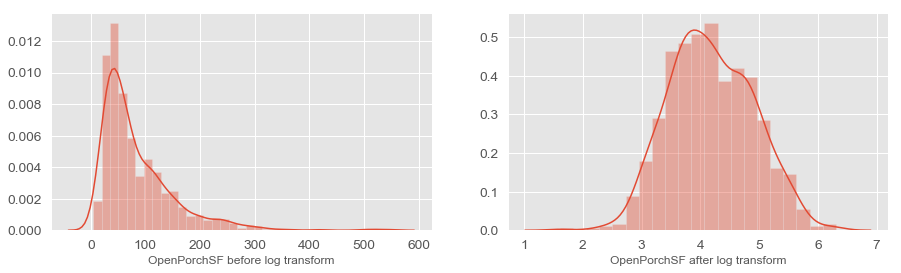

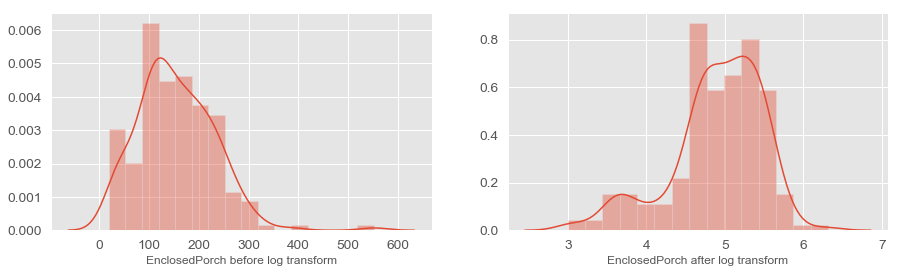

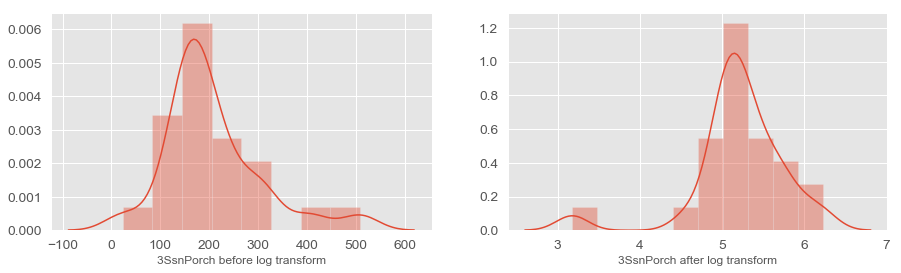

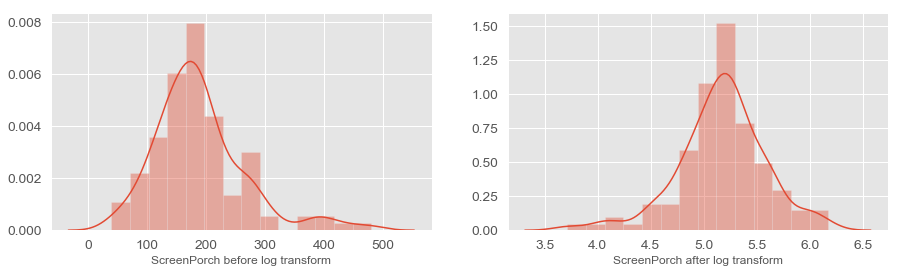

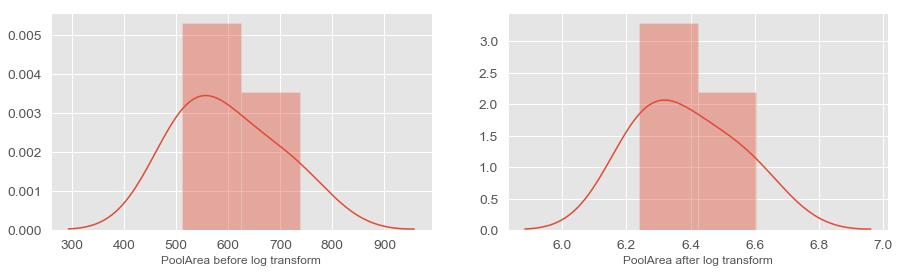

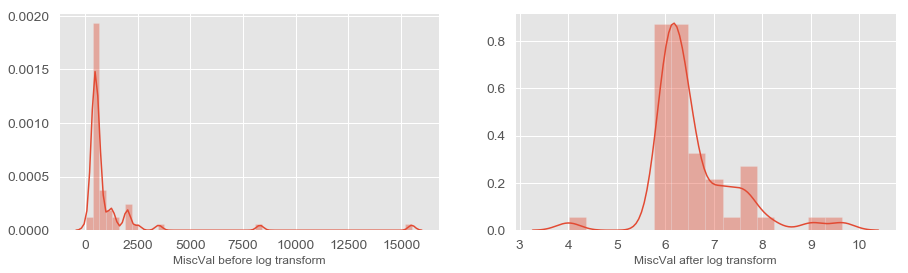

In [434]:
##plot before and after charts
for f in num_continous:
    fig,axes = plt.subplots(1, 2, figsize=(15, 4))
    g = sns.distplot(train[f][train[f] != 0], ax=axes[0])
    g.set(xlabel =f"{f} before log transform")
    g = sns.distplot(train_transformed[f][train_transformed[f] != 0], ax=axes[1])
    g.set(xlabel =f"{f} after log transform")


numerical features are closer to the normal curve post transformation

In [435]:

train_transformed.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

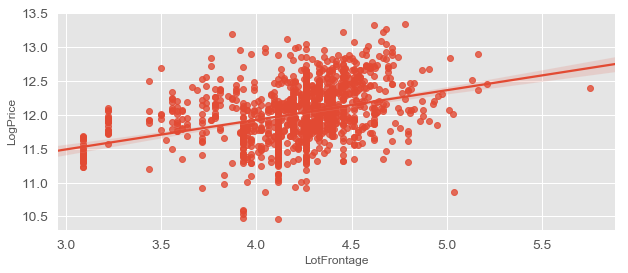

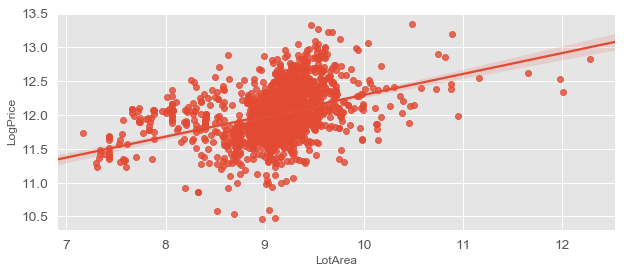

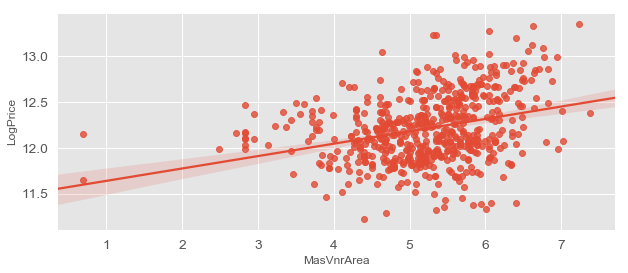

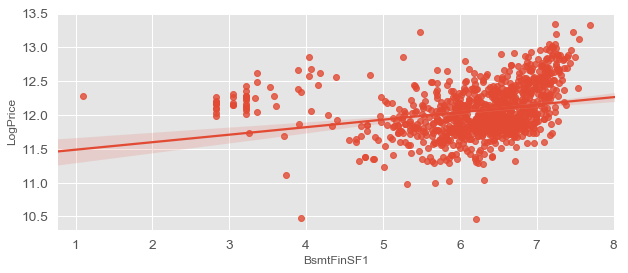

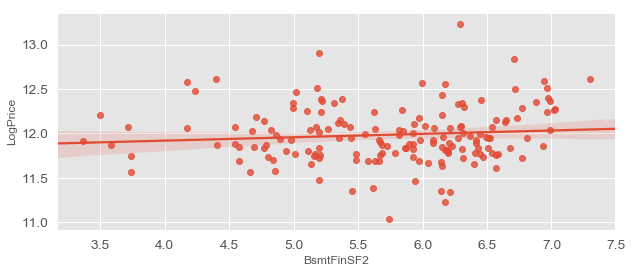

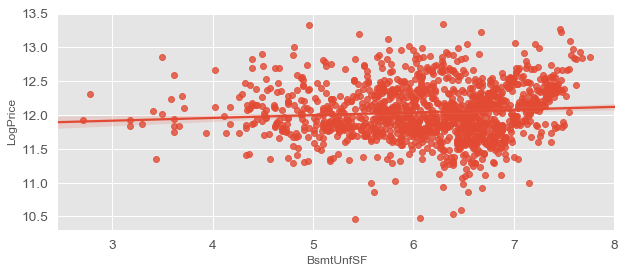

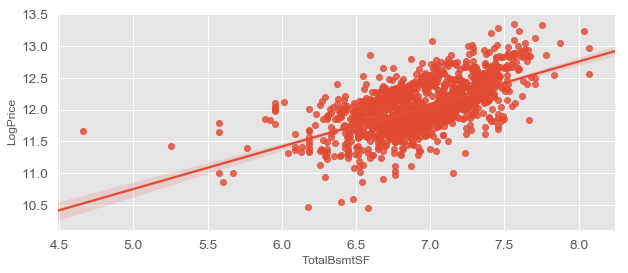

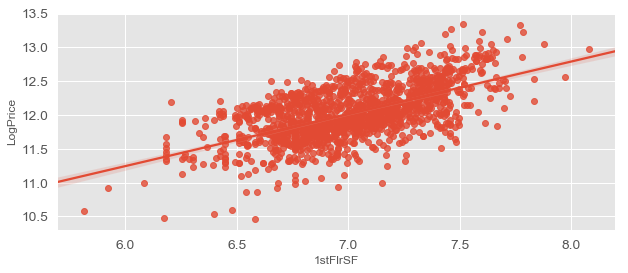

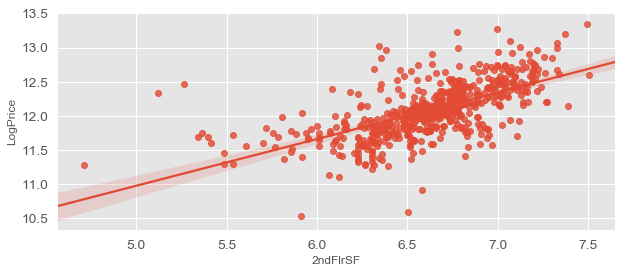

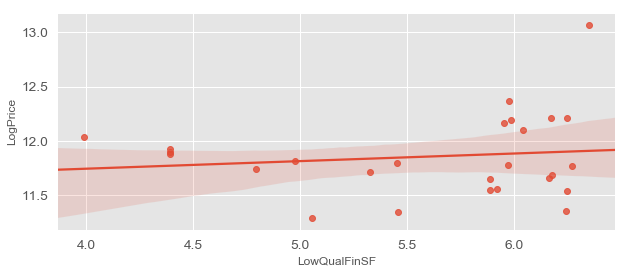

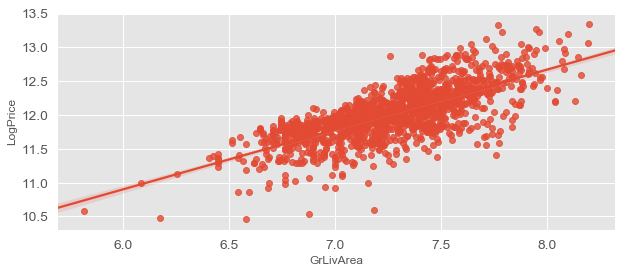

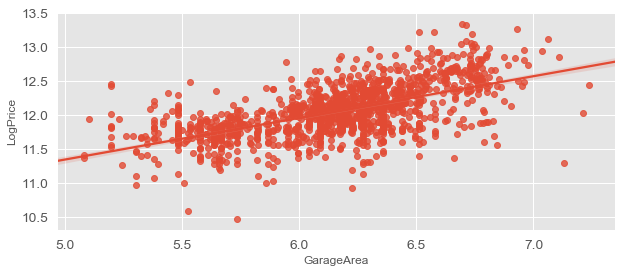

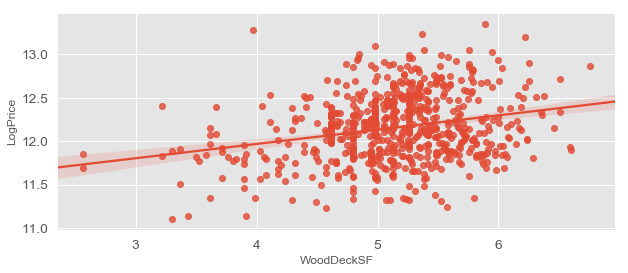

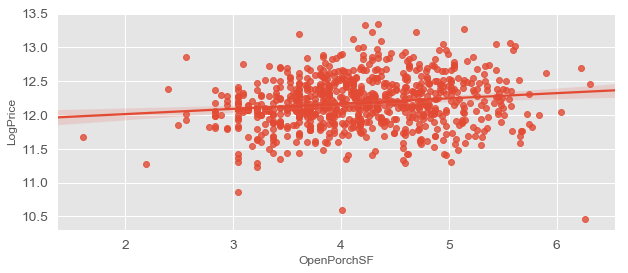

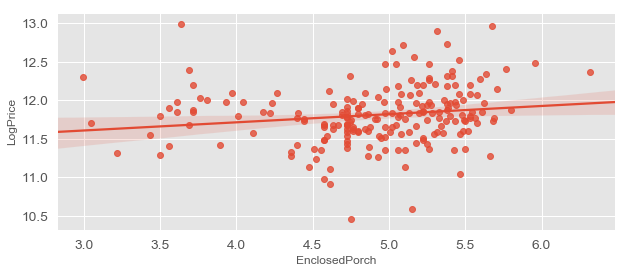

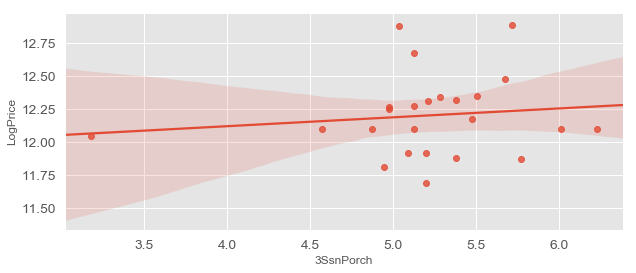

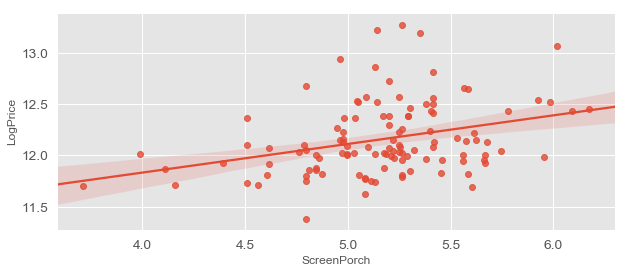

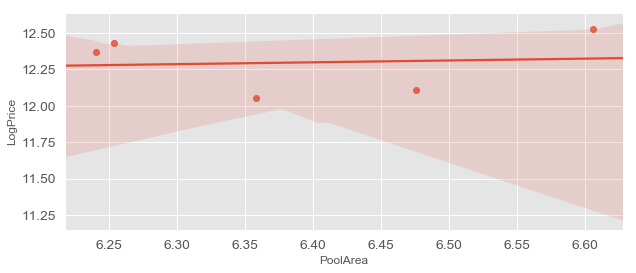

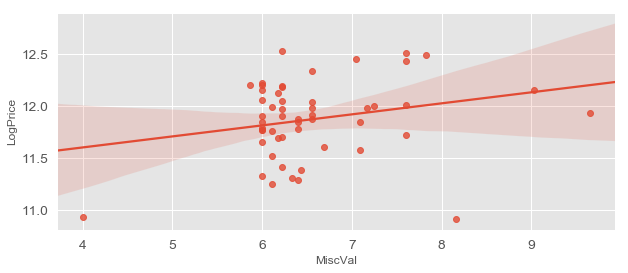

In [436]:
##scatter plot of saleprice vs the log transformed predictors
#num_continous = num_continous.remove('LogPrice')

for f in num_continous:
    fig,axes = plt.subplots(1, 1, figsize=(10, 4))
    g = sns.regplot(train_transformed[f][train_transformed[f]!=0], train['LogPrice'][train_transformed[f]!=0])
    

BsmtFinSF1 might fit better with quadratic.
Strongest linear relationships:
    LotFrontage, LotArea, MasVnrArea,TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF

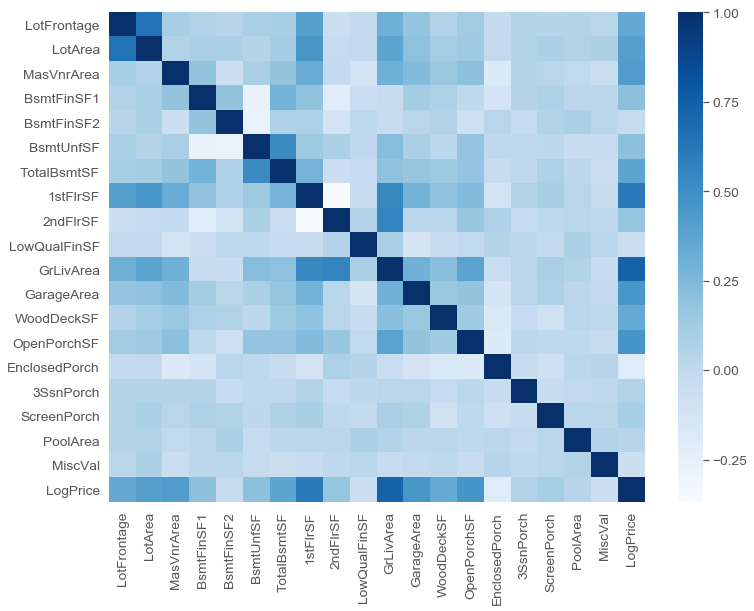

In [437]:
#another way is to look at their correlation to LogPrice
train_transformed['LogPrice'] = train['LogPrice']
corMatrix = train_transformed.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corMatrix, cmap="Blues")

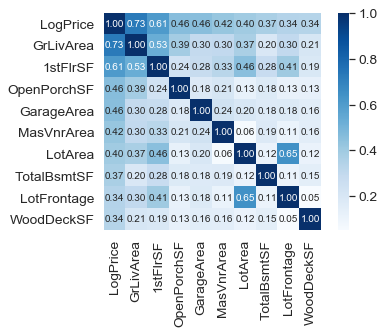

In [438]:
##hone in on top k most correlated
k = 10 #number of variables for heatmap
cols = corMatrix.nlargest(k, 'LogPrice')['LogPrice'].index
cm = np.corrcoef(train_transformed[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="Blues", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

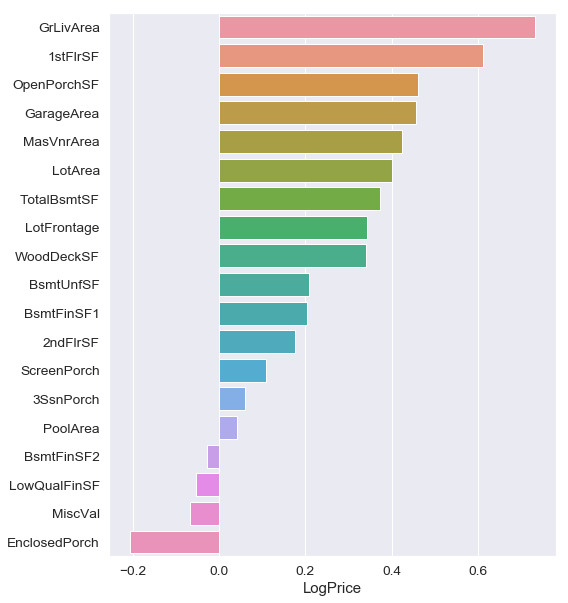

In [439]:
#another view of correlation to saleprice
corr = corMatrix.sort_values('LogPrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.LogPrice[1:], corr.index[1:], orient='h')
plt.show()

In [442]:
if apply_transform:
    for f in num_continous:
        df.loc[:,f] = np.log1p(df[f])

## Standardize

In [444]:
# standardize LogPrice, save the scaler for the inverse transform
if apply_standardization:
    logprice_scaler = StandardScaler().fit(LogPrice[:,np.newaxis])
    Y = logprice_scaler.transform(LogPrice[:,np.newaxis])

In [445]:
# When we take log of the varibale, XY plots revert to exponential-like forms.  
# If we want linearity, keep X intact, log-transform only Y -- discuss

# for f in num_value:
#     df[f] = np.log1p(df[f])

In [446]:
# standardize numerical predictors. fit on train, transorm both train and test
if apply_standardization:
    for f in num_continous:
        scaler = StandardScaler().fit(df[f][:len(LogPrice), np.newaxis])
        df[f] = scaler.transform(df[f][:,np.newaxis])

## Feature Generation

In [447]:
##adding some numerical features that are usually looked at together

df['TotalSF'] = df.TotalBsmtSF + df.GrLivArea
df['TotalFloorSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + \
    df['3SsnPorch'] + df.ScreenPorch

In [448]:
num_continous += ['TotalSF','TotalFloorSF','TotalPorchSF']

# Dummify the nominal values.

In [450]:

df = pd.get_dummies(df,drop_first=True)

In [451]:
df.shape

(2915, 248)

# VIF check for multicollinearity

In [452]:
#Rob: added VIF just because...

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.iloc[:len(LogPrice),:].values, i) for i in range(df.shape[1])]

In [453]:
vif.sort_values(by=['VIF'], ascending=False)

,features,VIF
63,_MiscFeature,inf
25,1stFlrSF,inf
49,EnclosedPorch,inf
22,TotalBsmtSF,inf
50,3SsnPorch,inf
26,2ndFlrSF,inf
51,ScreenPorch,inf
57,_Garage,inf
139,BldgType_Duplex,inf
178,Exterior2nd_CBlock,inf


huge multicollinearity in the feature space

## Features Checkpoint

In [454]:
import time
df.to_csv(f'data/features_{round(time.time())}.csv', index=False)  #Rob: added index=False

In [455]:
X = df #Rob: should be changed to read from CSV
X_train = X.iloc[:len(Y), :]
X_test  = X.iloc[len(Y):, :]

In [456]:
X_train.shape, X_test.shape, Y.shape 

((1456, 248), (1459, 248), (1456, 1))

# ============ MODEL ============

## Cross validate

In [96]:
import sklearn.model_selection as ms

from sklearn import linear_model


In [162]:
lasso = linear_model.Lasso(alpha=0.5) 
lasso.fit(X_train, Y) 

r2 = lasso.score(X_train, Y)
beta0 = lasso.intercept_

betas = pd.Series(lasso.coef_, index=X_train.columns)
betas = betas[betas>0].sort_values(axis=0, ascending=False)

print(r2)
print(beta0)
print(betas)

0.5755707399933673
[-50.57469607]
TotRmsAbvGrd    0.060270
FireplaceQu     0.037009
YearRemodAdd    0.014286
YearBuilt       0.010628
GarageYrBlt     0.000433
dtype: float64


In [163]:
import sklearn.model_selection as ms

In [169]:
lasso = linear_model.Lasso(alpha=0.01) 
scores = ms.cross_val_score(estimator=lasso, X=X_train, y=Y, cv=10)

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

Scores: [0.87353288 0.91893666 0.92871351 0.90100131 0.8996687  0.89773548
 0.89840003 0.91464896 0.90404282 0.89972511]
Score mean: 0.9036405460077008
Score std deviation: 0.014109742188244657


In [177]:
r2_mean = []
r2_se = []
 
kfold = range(5,40,5)    
for i in kfold:
    print(f'Evaluating kfold={i}')
    scores = ms.cross_val_score(estimator=lasso, X=X_train, y=Y, cv=i)
    r2_mean.append(scores.mean())
    r2_se.append(scores.std())

Evaluating kfold=5
Evaluating kfold=10
Evaluating kfold=15
Evaluating kfold=20
Evaluating kfold=25
Evaluating kfold=30
Evaluating kfold=35


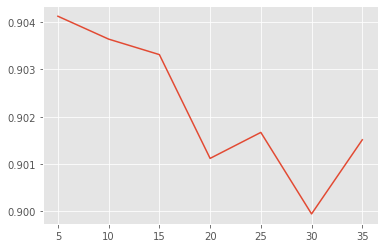

In [180]:
plt.plot(kfold, r2_mean)
plt.plot(kfold, r2_se, color='black')
plt.show()

In [181]:
# CONCLUSION: USE 5-FOLD

## Feature selection

In [328]:
mi = mutual_info_regression(X_train, Y)
mi /= np.max(mi)

mi = pd.Series(mi, index=X_train.columns)
mi = mi.sort_values(axis=0, ascending=False)

mi[-20:]

Exterior2nd_ImStucc    0.0
RoofMatl_Roll          0.0
MoSold_11              0.0
MoSold_10              0.0
MoSold_1               0.0
Exterior2nd_CBlock     0.0
PoolArea               0.0
PoolQC                 0.0
MiscFeature_None       0.0
Exterior1st_CBlock     0.0
Exterior1st_BrkFace    0.0
MSSubClass_45          0.0
Exterior1st_AsphShn    0.0
MSSubClass_70          0.0
MSSubClass_75          0.0
MSSubClass_85          0.0
RoofMatl_WdShngl       0.0
MSZoning_None          0.0
RoofMatl_Tar&Grv       0.0
MiscFeature_Othr       0.0
dtype: float64

## Grid Search

In [299]:
def prices_from_normalized(normalized):
    return np.exp(logprice_scaler.inverse_transform(normalized)).round()

In [300]:
def rmsle(y_true, y_hat):
    return np.sqrt(np.mean((np.log(y_true)-np.log(y_hat))**2))

In [234]:
def scores_lasso(alpha):
    
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, Y)
    r2 = lasso.score(X_train, Y)
    num_betas = len(lasso.coef_[lasso.coef_>0])

    scores = ms.cross_val_score(estimator=lasso, X=X_train, y=Y, cv=5)
    
    return r2, num_betas, scores.mean(), scores.std()

In [237]:
for alpha in [0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.1, 1]:
    lasso_0, lasso_1, lasso_2, lasso_3 = scores_lasso(alpha)
    print(f'Alpha= {alpha}\t r2_FULL={lasso_0:.3f}\t Features={lasso_1}',
          f'\t r2_mean_CV= {lasso_2:.3f}\t r2_se_CV= {lasso_3:.3f}')
    

Alpha= 0	 r2_FULL=0.945	 Features=138 	 r2_mean_CV= 0.892	 r2_se_CV= 0.013
Alpha= 0.0001	 r2_FULL=0.944	 Features=118 	 r2_mean_CV= 0.907	 r2_se_CV= 0.006
Alpha= 0.0003	 r2_FULL=0.942	 Features=102 	 r2_mean_CV= 0.915	 r2_se_CV= 0.006
Alpha= 0.001	 r2_FULL=0.937	 Features=72 	 r2_mean_CV= 0.921	 r2_se_CV= 0.006
Alpha= 0.003	 r2_FULL=0.929	 Features=56 	 r2_mean_CV= 0.918	 r2_se_CV= 0.005
Alpha= 0.01	 r2_FULL=0.910	 Features=32 	 r2_mean_CV= 0.904	 r2_se_CV= 0.007
Alpha= 0.1	 r2_FULL=0.853	 Features=11 	 r2_mean_CV= 0.849	 r2_se_CV= 0.008
Alpha= 1	 r2_FULL=0.461	 Features=3 	 r2_mean_CV= 0.454	 r2_se_CV= 0.027


In [228]:
# Conclusion: Optimal Alpha for LASSO =0.001

In [279]:
from sklearn.model_selection import KFold, cross_val_score

In [320]:
from xgboost import XGBRegressor

In [321]:
xgboost = XGBRegressor(learning_rate=0.01,   # GridSearch?
                       #n_estimators=3460,
                       max_depth=3,          #  GridSearch
                       min_child_weight=1,   # another regularization, default 1
                       reg_alpha=0.0001,      # L1 reg on weights  - GridSearch
                       gamma=0,       # min.similarity threshold 
                       subsample=0.8,         # cross-validation capability
                       colsample_bytree=0.3,  # ~ about 25%-30% of columns - GridSearch
#                        reg_lambda = 
                       objective= 'reg:squarederror',
                       nthread=-1,            # may help on GPU
                       seed=2020,
                       verbosity=2
                       )


In [322]:
xgboost.fit(X_train, Y)

[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned

[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:34:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 14 extra nodes, 0 pruned

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2020, reg_alpha=0.0001,
             reg_lambda=1, scale_pos_weight=1, seed=2020, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=2)

In [324]:
y_hat_train = xgboost.predict(X_train)

0.4495469665719781


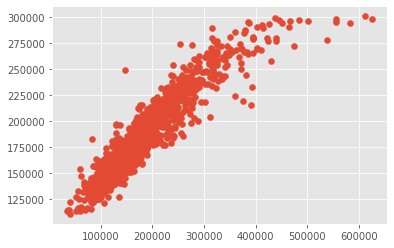

In [325]:
print(rmsle(prices_from_normalized(Y), prices_from_normalized(y_hat_train)))
plt.scatter(prices_from_normalized(Y), prices_from_normalized(y_hat_train))

In [326]:
y_hat = xgboost.predict(X_test)
y_hat = prices_from_normalized(y_hat)

In [327]:
submission_df = pd.DataFrame(data={'Id':test.Id, 'SalePrice':y_hat})
submission_df.to_csv(f'./predictions_{round(time.time())}.csv', index=False)

In [ ]:
#Your submission scored 0.25310

In [315]:
model = linear_model.Lasso(alpha=0.001) 
model.fit(X_train, Y) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [302]:
y_hat = model.predict(X_test)
y_hat = logprice_scaler.inverse_transform(y_hat)
y_hat = np.exp(y_hat).round()
y_hat

array([119653., 154311., 177907., ..., 169286., 117146., 227628.])

In [263]:
submission_df = pd.DataFrame(data={'Id':test.Id, 'SalePrice':y_hat})
submission_df.to_csv(f'./predictions_{round(time.time())}.csv', index=False)

In [316]:
y_hat_train = model.predict(X_train)
# y_hat_train = prices_from_normalized(y_hat_train)

In [317]:
print(rmsle(prices_from_normalized(Y), prices_from_normalized(y_hat_train)))
plt.scatter(prices_from_normalized(Y), prices_from_normalized(y_hat_train))

0.5495247366868748

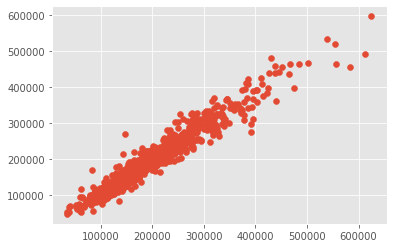